![Astrofisica Computacional](../../logo.PNG)

---
## 01. Decision Trees. Stellar Type.

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this notebook we will train a decision tree algorithm to predict the stellar type of an object from six physical features.


---

## Stellar Types

We will consider a dataset from [Deepraj Baidya](https://www.kaggle.com/deepu1109) available at

[https://www.kaggle.com/datasets/deepu1109/star-dataset](https://www.kaggle.com/datasets/deepu1109/star-dataset)


This is a dataset includes 240 objects (samples) and 7 features of stars

- Absolute Temperature [$K$]
- Relative Luminosity [$L/L_{\odot}$]
- Relative Radius [$R/R_{\odot}$]
- Absolute Magnitude [$M_v$]
- Star Color [white,Red,Blue,Yellow,yellow-orange etc]
- Spectral Class [O,B,A,F,G,K,M]
- **Star Type [Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , SuperGiant, HyperGiant]**

where 

$L_{\odot} = 3.828 x 10^26$ Watts (Avg Luminosity of Sun)

$R_{\odot} = 6.9551 x 10^8$ m (Avg Radius of Sun).

The data is a combination of observational and synthetic values. We want to train a decision tree algorithm that predicts the *Star Type* from the other 6 features in the dataset.

---

## The data

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('6class.csv')
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


We will use this data to obtain the Hertzprung-Rusell diagram,

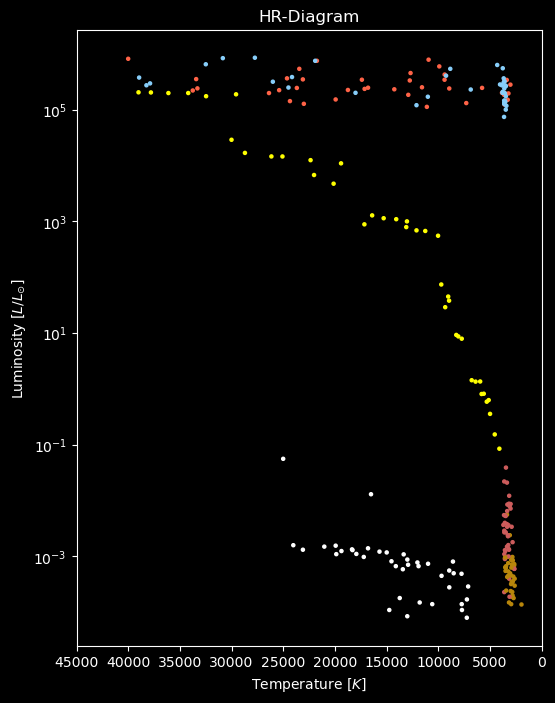

In [4]:
colors = {0:'darkgoldenrod' , 1:'indianred', 2:'white', 3:'yellow', 4:'tomato', 5:'lightskyblue'}

plt.style.use('dark_background')
plt.figure(figsize=(6,8))
plt.scatter(df['Temperature (K)'], df['Luminosity(L/Lo)'], marker='.',
            c = [colors[i] for i in df['Star type']],
            s=20)

plt.xlim(45000,0)
plt.yscale('log')
plt.xlabel(r'Temperature [$K$]')
plt.ylabel(r'Luminosity [$L/L_{\odot}$]')
plt.title('HR-Diagram')
plt.show()

---
## Preparing the Data

Using the `.describe()` method we note that the features `'Star color'` and `'Spectral class'` are not numbers but strings.

In [5]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


The values of the `'Spectral Class'` feature and its corresponding counts are

In [6]:
df['Spectral Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral Class, dtype: int64

Note that python identifies the 7 spectral classes as unique values,

In [7]:
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

On the other hand, the `'Spectral class'` information gives a lot of different values,

In [8]:
df['Star color'].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

In order to simplify this information, we will re-define the colors manually:

In [9]:
## Simplification of the color information
df.replace({"Star color" : {"Blue-white" : "Blue-White", 
                                  "Blue White" : "Blue-White", 
                                  "Blue white" : "Blue-White", 
                                  "Blue white " : "Blue-White", 
                                  "Blue-White" : "Blue-White",
                                  "yellow-white" : "Yellow-White",
                                  "Yellowish White" : "Yellow-White",
                                  "yellowish" : "Yellow-White",
                                  "White-Yellow" : "Yellow-White",
                                  "Yellowish" : "Yellow-White",
                                  "white" : "White",
                                  "Whitish" : "White",
                                  "Blue " : "Blue",
                                  "Pale yellow orange" : "Red",
                                  "Orange" : "Red",
                                  "Orange-Red" : "Red"}},
                                  inplace = True)

Hence, we obtain only five star colors

In [10]:
df['Star color'].value_counts()

Red             116
Blue             56
Blue-White       41
Yellow-White     15
White            12
Name: Star color, dtype: int64

In [11]:
df['Star color'].unique()

array(['Red', 'Blue-White', 'White', 'Yellow-White', 'Blue'], dtype=object)

Once we  modify this feature and in order to work with this information, we will map them into integer values using the [Series.map()](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) method.

In [12]:
star_color_label = {value: key for key, value in enumerate(df['Star color'].unique())}
spec_class_label = {value: key for key, value in enumerate(df['Spectral Class'].unique())}

df['Star color'] = df['Star color'].map(star_color_label)
df['Spectral Class'] = df['Spectral Class'].map(spec_class_label)

df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,0,0
1,3042,0.000500,0.1542,16.60,0,0,0
2,2600,0.000300,0.1020,18.70,0,0,0
3,2800,0.000200,0.1600,16.65,0,0,0
4,1939,0.000138,0.1030,20.06,0,0,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,4,4
236,30839,834042.000000,1194.0000,-10.63,5,4,4
237,8829,537493.000000,1423.0000,-10.73,5,2,2
238,9235,404940.000000,1112.0000,-11.23,5,2,2


The new values of the  `'Star color'` are

In [13]:
df['Star color'].unique() , df['Star color'].value_counts()

(array([0, 1, 2, 3, 4]),
 0    116
 4     56
 1     41
 3     15
 2     12
 Name: Star color, dtype: int64)

and the new values of the  `'Spectral class'` are

In [14]:
df['Spectral Class'].unique() , df['Spectral Class'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6]),
 0    111
 1     46
 4     40
 2     19
 3     17
 5      6
 6      1
 Name: Spectral Class, dtype: int64)

The correlation matrix gives the following information

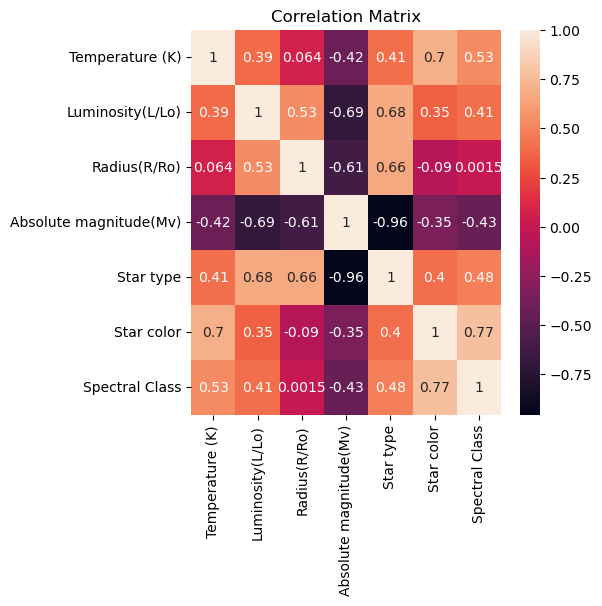

In [15]:
import seaborn as sns
plt.style.use('default')
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

---
## The Decision Tree

The first step will be to define the targets and the features and then, split the dataset into train and test subsets.

In [16]:
features = np.asarray([df['Temperature (K)'], 
                             df['Luminosity(L/Lo)'], 
                             df['Radius(R/Ro)'], 
                             df['Absolute magnitude(Mv)'],
                             df['Star color'],
                             df['Spectral Class']
                      ])
features = features.T
targets = np.asarray(df['Star type'])

features.shape, targets.shape


((240, 6), (240,))

In [17]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, random_state=60, test_size=0.5)

In [18]:
train_features.shape, train_targets.shape

((120, 6), (120,))

Before we train the classifier, we will use the function [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardize the features (by removing the mean and scaling to unit variance).

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_features = sc.fit_transform(train_features)
test_features = sc.transform(test_features)

Now, we import the [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html) class (Note that the `DecisionTreeClassifier` is used for targets with integer values while the `DecisionTreeRegressor` is used when the targets are floating point numbers).

We will try with a tree depth of 5.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

d_tree = DecisionTreeClassifier(max_depth=5)

d_tree

DecisionTreeClassifier(max_depth=5)

In [50]:
d_tree.fit(train_features, train_targets)

DecisionTreeClassifier(max_depth=5)

We will predict the results using the `'test_features'` subset,

In [51]:
predictions = d_tree.predict(test_features)

The [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function shows a report with the main classification metrics. In this case, the results are great!

In [52]:
print(classification_report(test_targets, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        18

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



The [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function computes the accuracy of gthe prediction. If the entire set of the predicted labels strictly match with the true set of labels, then the accuracy is 1.0; otherwise it is 0.0.

In [53]:
accuracy_score(test_targets, predictions)

1.0

Even our previous criteria of the median of the residuals gives this time

In [54]:
np.median(np.abs(predictions - test_targets))

0.0

A confusion matrix of prediction vs. targets shows the excellent results of the classification algorithm,

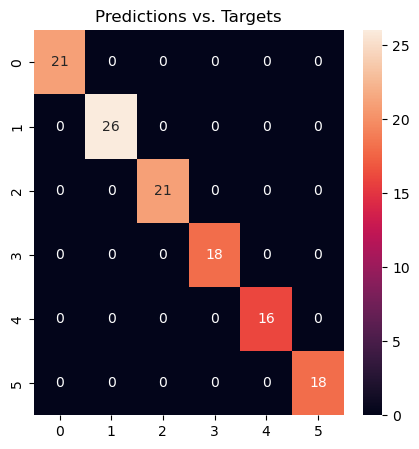

In [55]:
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(test_targets, predictions), annot=True)
plt.title('Predictions vs. Targets')
plt.show()

Finally, it is possible to visualize the decision tree:

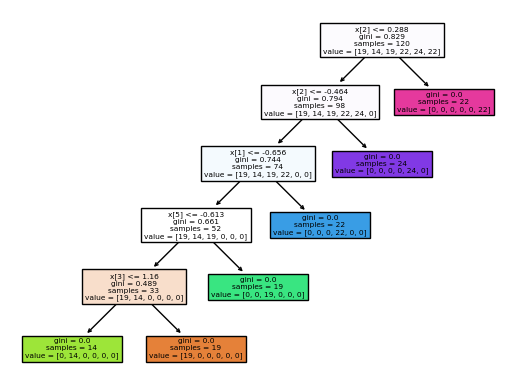

In [56]:
from sklearn import tree

fig = plt.figure()
_ = tree.plot_tree(d_tree, filled=True)